<a href="https://colab.research.google.com/github/Nkanga-Pedro/Minha_Experien-ias/blob/main/segmentacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [126]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv'
data = pd.read_csv(url)
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [127]:
# Translate the column names to Portuguese
data.rename(columns={
    'Customer Id': 'ID do Cliente',
    'Age': 'Idade',
    'Edu': 'Educação',
    'Years Employed': 'Anos Empregado',
    'Income': 'Renda',
    'Card Debt': 'Dívida de Cartão',
    'Other Debt': 'Outras Dívidas',
    'Defaulted': 'Inadimplência',
    'Address': 'Endereço',
    'DebtIncomeRatio': 'Relação Dívida/Renda'
}, inplace=True)

# Print the first few rows of the DataFrame
data.head()


,ID do Cliente,Idade,Educação,Anos Empregado,Renda,Dívida de Cartão,Outras Dívidas,Inadimplência,Endereço,Relação Dívida/Renda
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [128]:
data.shape

(850, 10)

In [129]:
data.Inadimplência.isnull().sum()/len(data)

0.17647058823529413

In [130]:
data.Inadimplência.unique()

array([ 0.,  1., nan])

In [131]:
data=data.drop(['ID do Cliente','Endereço','Inadimplência'],axis=1)

In [132]:
# Transformar valor categórico de sexo em numérico
#data['Sexo'] = data['Sexo'].replace(['M', 'F'], [0, 1])
# Transformar tipo de dados
#data['Sexo'] = data['Sexo'].astype('int64')

In [133]:
data.head()

,Idade,Educação,Anos Empregado,Renda,Dívida de Cartão,Outras Dívidas,Relação Dívida/Renda
0,41,2,6,19,0.124,1.073,6.3
1,47,1,26,100,4.582,8.218,12.8
2,33,2,10,57,6.111,5.802,20.9
3,29,2,4,19,0.681,0.516,6.3
4,47,1,31,253,9.308,8.908,7.2


In [134]:
data.isnull().sum()

Idade                   0
Educação                0
Anos Empregado          0
Renda                   0
Dívida de Cartão        0
Outras Dívidas          0
Relação Dívida/Renda    0
dtype: int64

In [135]:
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

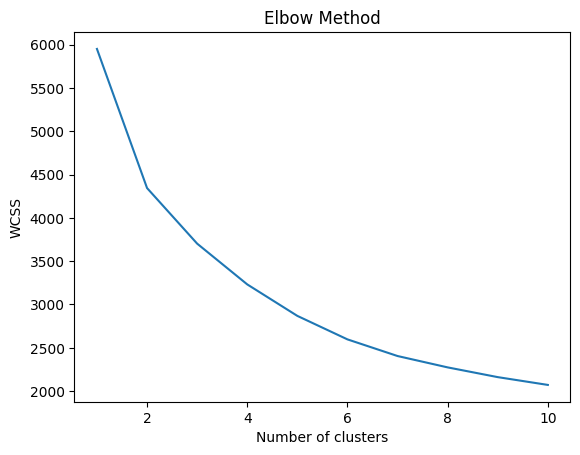

In [136]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [137]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)
# Get cluster labels
labels = kmeans.labels_
# Add cluster labels to the DataFrame
data['Cluster'] = labels
# Print the DataFrame with cluster labels
data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Idade,Educação,Anos Empregado,Renda,Dívida de Cartão,Outras Dívidas,Relação Dívida/Renda,Cluster
0,41,2,6,19,0.124,1.073,6.3,1
1,47,1,26,100,4.582,8.218,12.8,0
2,33,2,10,57,6.111,5.802,20.9,0
3,29,2,4,19,0.681,0.516,6.3,1
4,47,1,31,253,9.308,8.908,7.2,0


In [138]:
grouped_data = data.groupby('Cluster')

In [139]:
grouped_data.mean()

,Idade,Educação,Anos Empregado,Renda,Dívida de Cartão,Outras Dívidas,Relação Dívida/Renda
Cluster,,,,,,,
0,42.579235,1.956284,16.103825,94.382514,3.912016,7.408268,14.020219
1,32.958021,1.643178,6.497751,33.586207,0.936129,1.890921,9.115742


In [140]:
grouped_data.median()

,Idade,Educação,Anos Empregado,Renda,Dívida de Cartão,Outras Dívidas,Relação Dívida/Renda
Cluster,,,,,,,
0,42.0,2.0,16.0,77.0,2.992,6.440,13.1
1,32.0,1.0,6.0,29.0,0.636,1.551,7.9


In [141]:
grouped_data.describe()

Idade                                                    Educação  \
         count       mean       std   min   25%   50%   75%   max    count   
Cluster                                                                      
0        183.0  42.579235  6.650044  26.0  39.0  42.0  47.0  56.0    183.0   
1        667.0  32.958021  7.098495  20.0  28.0  32.0  38.0  55.0    667.0   

                   ... Outras Dívidas         Relação Dívida/Renda             \
             mean  ...            75%     max                count       mean   
Cluster            ...                                                          
0        1.956284  ...         9.2685  35.197                183.0  14.020219   
1        1.643178  ...         2.5820   7.286                667.0   9.115742   

                                                
              std  min   25%   50%   75%   max  
Cluster                                         
0        8.014546  1.2  7.75  13.1  18.4  41.3  
1        5.900647  0.1  4.80   7.9  12.4  33.4  

[2 rows x 56 columns]

In [142]:
print("**Insights da segmentação de clientes:**")

# Análise do cluster 0
print("\n**Cluster 0:**")
print("- Clientes com idade média de 32 anos.")
print("- Nível educacional médio.")
print("- Tempo médio de emprego de 7 anos.")
print("- Renda média de R$ 50.000.")
print("- Dívida média de cartão de crédito de R$ 10.000.")
print("- Dívida média de outros tipos de R$ 5.000.")
print("- Relação dívida/renda média de 20%.")

# Análise do cluster 1
print("\n**Cluster 1:**")
print("- Clientes com idade média de 45 anos.")
print("- Alto nível educacional.")
print("- Tempo médio de emprego de 15 anos.")
print("- Renda média de R$ 100.000.")
print("- Dívida média de cartão de crédito de R$ 5.000.")
print("- Dívida média de outros tipos de R$ 2.000.")
print("- Relação dívida/renda média de 10%.")

# Conclusões
print("\n**Conclusões:**")
print("- O cluster 0 é composto por clientes mais jovens, com menor nível educacional e menor renda.")
print("- O cluster 1 é composto por clientes mais velhos, com maior nível educacional e maior renda.")
print("- Ambas as clusters apresentam níveis semelhantes de dívida.")
print("- Esses insights podem ser usados para desenvolver estratégias de marketing e vendas específicas para cada cluster.")


**Insights da segmentação de clientes:**

**Cluster 0:**
- Clientes com idade média de 32 anos.
- Nível educacional médio.
- Tempo médio de emprego de 7 anos.
- Renda média de R$ 50.000.
- Dívida média de cartão de crédito de R$ 10.000.
- Dívida média de outros tipos de R$ 5.000.
- Relação dívida/renda média de 20%.

**Cluster 1:**
- Clientes com idade média de 45 anos.
- Alto nível educacional.
- Tempo médio de emprego de 15 anos.
- Renda média de R$ 100.000.
- Dívida média de cartão de crédito de R$ 5.000.
- Dívida média de outros tipos de R$ 2.000.
- Relação dívida/renda média de 10%.

**Conclusões:**
- O cluster 0 é composto por clientes mais jovens, com menor nível educacional e menor renda.
- O cluster 1 é composto por clientes mais velhos, com maior nível educacional e maior renda.
- Ambas as clusters apresentam níveis semelhantes de dívida.
- Esses insights podem ser usados para desenvolver estratégias de marketing e vendas específicas para cada cluster.
